## Business Understanding
[Google Colab Terbaru](https://colab.research.google.com/drive/1MWkH0j0BuHP_khtcQ-7PUKdURDSUsJkw?usp=sharing)

> Dataset yang digunakan adalah data pelanggan di suatu mall

<p align="center">
  <img src="https://hqlco.github.io/dataset/Mall-of-the-Emirates.webp" alt="Deskripsi Gambar" width="500" height="300">
</p>

#### **1. Latar Belakang**
Mall atau pusat perbelanjaan adalah tempat yang menawarkan berbagai macam produk dan layanan kepada konsumen. Untuk meningkatkan keuntungan dan efisiensi pemasaran, manajemen mall perlu memahami perilaku pelanggan mereka. Pemahaman ini memungkinkan mall untuk menargetkan pelanggan yang tepat dengan penawaran yang relevan, sehingga meningkatkan pengalaman berbelanja dan loyalitas pelanggan.

#### **2. Tujuan**
Tujuan utama dari analisis ini adalah untuk mengidentifikasi segmen-segmen pelanggan berdasarkan perilaku mereka dalam hal pendapatan tahunan dan pola pengeluaran. Dengan memisahkan pelanggan ke dalam segmen yang berbeda, mall dapat merancang strategi pemasaran yang lebih terarah dan efektif, misalnya dengan menyesuaikan promosi, tata letak toko, atau layanan khusus untuk setiap segmen pelanggan.

#### **3. Implikasi Keputusan**
Setelah segmen pelanggan diidentifikasi melalui analisis ini, manajemen mall dapat membuat keputusan yang lebih baik terkait alokasi anggaran pemasaran, penempatan produk, penawaran khusus, dan pengembangan fasilitas yang lebih menarik bagi segmen pelanggan yang paling menguntungkan.

### Load Dataset

In [ ]:
import pandas as pd
df = pd.read_csv("https://hqlco.github.io/dataset/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Understanding

Tahap awal dalam proses data science atau machine learning yang bertujuan untuk memahami karakteristik, struktur, dan kualitas data yang tersedia. Tahap ini sangat penting karena pemahaman yang baik tentang data akan mempengaruhi keputusan dan langkah-langkah selanjutnya dalam proyek analisis data atau pengembangan model.

- Menampilkan lima baris pertama dari dataset

In [ ]:
# Menampilkan lima baris pertama dari dataset
print("Lima baris pertama dari dataset:")
print(df.head())

Lima baris pertama dari dataset:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


- Menampilkan informasi tentang dataset

In [ ]:
# Menampilkan informasi tentang dataset
print("\nInformasi tentang dataset:")
print(df.info())


Informasi tentang dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


- Menampilkan statistik ringkasan dari dataset

In [ ]:
# Menampilkan statistik ringkasan dari dataset
print("\nStatistik ringkasan dari dataset:")
print(df.describe())


Statistik ringkasan dari dataset:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


- Memeriksa missing values

In [ ]:
# Memeriksa missing values
print("\nMissing values dalam dataset:")
print(df.isnull().sum())


Missing values dalam dataset:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


- Menampilkan distribusi data untuk fitur kategorikal

In [ ]:
# Menampilkan distribusi data untuk fitur kategorikal
print("\nDistribusi fitur kategorikal:")
print(df['Genre'].value_counts())


Distribusi fitur kategorikal:
Genre
Female    112
Male       88
Name: count, dtype: int64


## Data Preprocessing

Tahap Selanjutnya dalam data science atau machine learning, di mana data mentah yang telah dikumpulkan dan dipahami diolah dan dipersiapkan agar siap digunakan dalam analisis atau pembangunan model. Proses ini bertujuan untuk memastikan bahwa data yang digunakan berkualitas tinggi, bebas dari kesalahan, dan dalam format yang sesuai untuk teknik analitis atau algoritma yang akan digunakan.

- Mengonversi data kategorikal menjadi numerik (jika diperlukan)

In [ ]:
# Mengonversi data kategorikal menjadi numerik (jika diperlukan)
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})

- Memeriksa outlier menggunakan metode IQR

In [ ]:
# Memeriksa outlier menggunakan metode IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

print("\nJumlah outlier di setiap kolom:")
print(outliers)


Jumlah outlier di setiap kolom:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        2
Spending Score (1-100)    0
dtype: int64


- Menyaring data outlier

In [ ]:
# Menyaring data outlier
outliers = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nData yang merupakan outlier:")
print(outliers)


Data yang merupakan outlier:
     CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)
198         199      0   32                 137                      18
199         200      0   30                 137                      83


- Drop data yang mengandung outlier data

In [ ]:
df = df.drop(outliers.index)

# Algoritma Clustering

## K-MEANS

#### Apa itu K-Means?
K-Means adalah algoritma **unsupervised learning** yang digunakan untuk mengelompokkan data ke dalam sejumlah klaster yang telah ditentukan sebelumnya. Tujuan utama K-Means adalah untuk meminimalkan variasi (jarak) dalam setiap klaster dan memaksimalkan variasi antara klaster yang berbeda.

Contoh sederhana ilustrasi algoritma K-Means:

<p align="center">
  <img src="https://hqlco.github.io/dataset/kmeans-gif.gif" alt="Deskripsi Gambar" width="500" height="400">
</p>


#### Langkah-Langkah Algoritma K-Means:
Berikut adalah langkah-langkah algoritma K-Means secara lebih rinci, termasuk perhitungan matematis yang terlibat:

### 1. Inisialisasi

- **Pilih jumlah klaster (k):**
  Tentukan jumlah klaster yang diinginkan (`k`), yang akan menjadi jumlah kelompok yang terbentuk dari data.

- **Pilih centroid awal:**
  Secara acak pilih `k` titik dari dataset sebagai centroid awal. Centroid ini akan menjadi titik pusat dari klaster awal yang terbentuk.

### 2. Penugasan Klaster

- **Hitung jarak:**
  Untuk setiap titik data `x_i`, hitung jarak ke setiap centroid `C_j` menggunakan rumus jarak, biasanya Euclidean distance:

  $$
  d(x_i, C_j) = \sqrt{(x_{i1} - C_{j1})^2 + (x_{i2} - C_{j2})^2 + \dots + (x_{in} - C_{jn})^2}
  $$

  Di sini, $x_i$ dan $C_j$ adalah vektor dari titik data dan centroid ke-j, masing-masing.

- **Tetapkan ke klaster terdekat:**
  Tetapkan setiap titik data ke klaster dengan centroid terdekat, yaitu klaster dengan nilai jarak terendah.

### 3. Menghitung Ulang Centroid

- **Hitung centroid baru:**
  Setelah semua titik data ditetapkan ke klaster, hitung ulang centroid untuk setiap klaster. Centroid baru dihitung sebagai rata-rata dari semua titik data dalam klaster tersebut:

  $$
  C_j = \frac{1}{n_j} \sum_{i=1}^{n_j} x_i
  $$

  Di sini, $ C_j $ adalah centroid baru dari klaster ke-j, $ n_j $ adalah jumlah titik dalam klaster ke-j, dan $ x_i $ adalah vektor dari titik data yang termasuk dalam klaster tersebut.

### 4. Iterasi

- **Periksa konvergensi:**
  Ulangi langkah penugasan klaster dan menghitung ulang centroid hingga kondisi konvergensi tercapai. Kondisi konvergensi biasanya dicapai jika:
  - Centroid tidak lagi berubah posisi secara signifikan, yaitu perubahan dalam posisi centroid berada di bawah ambang batas yang ditentukan.
  - Atau telah mencapai iterasi maksimum yang telah ditetapkan sebelumnya.

### 5. Hasil Akhir

- **Output klaster:**
  Setelah iterasi selesai, algoritma menghasilkan pembagian data menjadi `k` klaster. Setiap klaster memiliki centroid yang mewakili pusat dari klaster tersebut, dan setiap titik data ditetapkan ke salah satu dari `k` klaster.

### Contoh Perhitungan Sederhana

Misalkan kita memiliki dataset dua dimensi dengan tiga titik data: A (1,2), B (2,3), C (4,5) dan kita ingin membaginya menjadi dua klaster (k=2).

1. **Inisialisasi:**
   Pilih centroid awal, misalnya A dan C sebagai centroid awal (C1 = A = (1,2), C2 = C = (4,5)).

2. **Penugasan Klaster:**
   - Hitung jarak dari B ke C1 dan C2:
     - $$\( d(B, C1) = \sqrt{(2-1)^2 + (3-2)^2} = \sqrt{1+1} = \sqrt{2} \)$$
     - $$\( d(B, C2) = \sqrt{(2-4)^2 + (3-5)^2} = \sqrt{4+4} = \sqrt{8} \)$$
   - B lebih dekat ke C1, jadi B ditetapkan ke klaster dengan centroid C1.

3. **Menghitung Ulang Centroid:**
   - Hitung centroid baru untuk klaster 1 (yang berisi A dan B):
     - $$\( C1_{\text{baru}} = \frac{(1,2) + (2,3)}{2} = (1.5, 2.5) \)$$
   - Klaster 2 tetap hanya berisi C, jadi centroidnya tidak berubah.

4. **Iterasi:**
   - Ulangi penugasan klaster dan perhitungan centroid hingga tidak ada perubahan yang signifikan pada centroid atau jumlah iterasi maksimum tercapai.

5. **Hasil Akhir:**
   - Data terkelompok menjadi dua klaster dengan centroid final yang mewakili masing-masing klaster.





### Modeling

- Import library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

- Memilih fitur yang digunakan untuk K-Means (Annual Income dan Spending Score)

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

- Tentukan jumlah klaster yang diinginkan dan lakukan modeling

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

- Menambahkan label klaster ke dalam dataset

In [ ]:
df['Cluster'] = kmeans.labels_

- Visualisasi hasil clustering

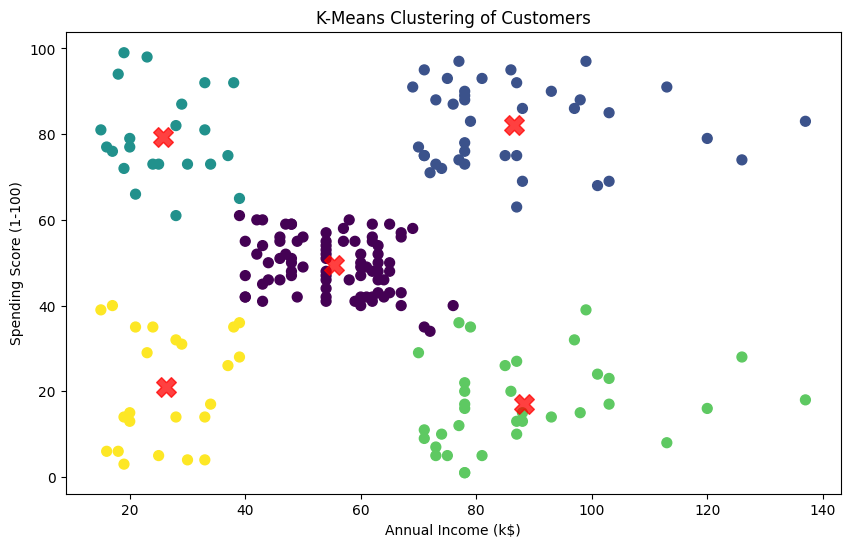

In [ ]:
# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))

# Plot data dengan warna berbeda untuk setiap klaster
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'],
            c=df['Cluster'], cmap='viridis', s=50)

# Menampilkan centroid
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            c='red', s=200, alpha=0.75, marker='X')

plt.title('K-Means Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

### Evaluasi


<p align="center">
  <img src="https://hqlco.github.io/dataset/kmeans-eval.png" alt="Deskripsi Gambar" width="600" height="300">
</p>


Dimana:
- **WCSS(k)** adalah jumlah kuadrat dari jarak antara setiap titik data dan centroid klaster di mana titik tersebut dimasukkan, untuk semua klaster `k`.
- **k** adalah jumlah klaster.
- **$x_i$** adalah titik data individual dalam klaster.
- **$\bar{x}_j$** adalah rata-rata (centroid) dari klaster ke-j.
- **$\|x_i - \bar{x}_j\|^2$** adalah jarak Euclidean yang dikuadratkan antara titik data $x_i$ dan centroid $ \bar{x}_j $.

### Apa itu WCSS?
- **WCSS** adalah ukuran variasi dalam klaster. Lebih khusus lagi, ini menghitung seberapa tersebar titik-titik data dalam klaster mereka sendiri.
- Tujuan dari algoritma K-Means adalah untuk meminimalkan WCSS, yang berarti kita ingin klaster yang terbentuk sepadat mungkin.

### Cara Kerja:
1. **Langkah Pertama** adalah menghitung centroid atau rata-rata dari semua titik data dalam satu klaster. Centroid ini adalah representasi pusat dari klaster.
   
2. **Langkah Selanjutnya** adalah menghitung jarak dari setiap titik data dalam klaster ke centroid klaster tersebut. Jarak ini kemudian dikuadratkan untuk memastikan bahwa nilai jarak positif dan untuk menghukum titik yang jauh lebih berat daripada titik yang dekat.
   
3. **Langkah Terakhir** adalah menjumlahkan semua jarak kuadrat ini untuk semua titik dalam satu klaster, dan kemudian mengulangi proses tersebut untuk setiap klaster, lalu menjumlahkan hasilnya.

### Fungsi WCSS dalam K-Means:
- **Menerapkan Elbow Method** adalah teknik di mana WCSS digunakan untuk menentukan jumlah klaster optimal. Saat kita memplot WCSS untuk berbagai nilai `k` (jumlah klaster), kita mencari "titik siku" (elbow point) pada grafik yang menunjukkan bahwa menambah jumlah klaster lebih lanjut tidak menghasilkan pengurangan signifikan pada WCSS.


In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

- Visualisasi Elbow Method

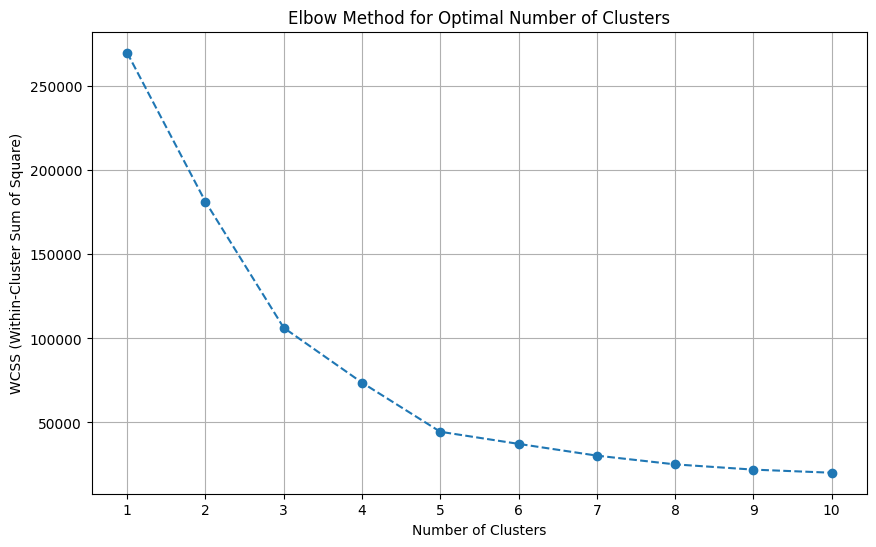

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Square)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

> Grafik Elbow di atas menunjukkan bahwa penurunan WCSS (Within-Cluster Sum of Squares) yang paling signifikan terjadi antara 1 hingga 3 klaster, dengan titik siku (elbow) yang jelas di klaster ke-3. Setelah klaster ke-3, penurunan WCSS melambat secara signifikan, meskipun ada sedikit penurunan hingga klaster ke-5. Oleh karena itu, jumlah klaster yang optimal tampaknya berada di antara 3 atau 5 klaster, dengan 3 klaster sebagai pilihan yang lebih efisien dan sederhana.

#### Kelebihan K-Means:
- **Sederhana dan Cepat**: Mudah diimplementasikan dan cukup cepat untuk data berukuran besar.
- **Skalabilitas**: Mampu menangani dataset dengan banyak dimensi dan data point.

#### Kekurangan K-Means:
- **Jumlah Klaster Harus Diketahui**: Pengguna harus menentukan jumlah klaster \(k\) di awal.
- **Sensitif Terhadap Inisialisasi**: Hasil akhir dapat bervariasi tergantung pada inisialisasi centroid.
- **Tidak Cocok untuk Klaster Tidak Bulat**: K-Means cenderung lebih baik pada klaster yang berbentuk bulat dan memiliki ukuran yang kurang lebih sama.

#### Kapan Menggunakan K-Means?
K-Means sangat berguna ketika Anda memiliki dataset yang ingin Anda kelompokkan berdasarkan kesamaan fitur, tetapi tidak memiliki label kelas yang sudah ada. Algoritma ini cocok untuk segmentasi pasar, pengelompokan dokumen, pengenalan pola, dan aplikasi lain yang membutuhkan pengelompokan data.

## DBSCAN

<p align="center">
  <img src="https://hqlco.github.io/dataset/DBSCAN.gif" alt="Deskripsi Gambar" width="600" height="400">
</p>

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) adalah salah satu algoritma clustering yang populer dalam bidang data mining dan machine learning. Algoritma ini digunakan untuk mengelompokkan data berdasarkan kepadatan titik-titik dalam suatu ruang. Berikut adalah penjelasan tentang bagaimana DBSCAN bekerja dan konsep-konsep penting yang terkait dengannya:

### 1. **Konsep Dasar DBSCAN**
DBSCAN bekerja dengan mengidentifikasi area dengan kepadatan tinggi dan memisahkannya dari area dengan kepadatan rendah. Ada dua parameter utama dalam DBSCAN:
   - **Epsilon (ε)**: Jarak maksimum antara dua titik sehingga masih bisa dianggap sebagai tetangga.
   - **MinPts**: Jumlah minimum titik yang diperlukan untuk membentuk sebuah cluster.

### 2. **Jenis Titik dalam DBSCAN**
DBSCAN mengkategorikan titik-titik dalam dataset menjadi tiga jenis:
   - **Core Point**: Titik yang memiliki setidaknya MinPts tetangga dalam radius ε. Titik ini merupakan pusat dari sebuah cluster.
   - **Border Point**: Titik yang berada dalam radius ε dari Core Point tetapi tidak memiliki cukup titik tetangga untuk menjadi Core Point. Titik ini terletak di tepi cluster.
   - **Noise Point**: Titik yang bukan merupakan Core Point atau Border Point. Titik ini tidak termasuk dalam cluster manapun.

### 3. **Langkah-langkah Algoritma DBSCAN**
   1. **Pemilihan Titik Awal**: Algoritma dimulai dengan memilih titik yang belum dikunjungi dari dataset.
   2. **Mengecek Tetangga**: Titik yang dipilih akan dievaluasi apakah memiliki setidaknya MinPts tetangga dalam radius ε.
   3. **Membentuk Cluster**: Jika titik tersebut adalah Core Point, cluster baru dibentuk, dan semua tetangganya yang belum dikunjungi akan ditambahkan ke dalam cluster. Langkah ini diulangi untuk semua tetangga yang memenuhi syarat.
   4. **Mengidentifikasi Noise**: Titik yang tidak memenuhi syarat sebagai Core Point atau Border Point akan dianggap sebagai Noise.
   5. **Ulangi**: Proses ini diulangi hingga semua titik dalam dataset telah dikunjungi.

### 4. **Kelebihan DBSCAN**
   - **Tidak perlu menentukan jumlah cluster di awal**, berbeda dengan algoritma seperti K-Means.
   - **Efektif untuk data dengan bentuk yang tidak teratur** karena tidak mengasumsikan bentuk cluster tertentu.
   - **Dapat mengidentifikasi noise dan outlier** secara otomatis.

### 5. **Kekurangan DBSCAN**
   - **Sensitif terhadap parameter ε dan MinPts**. Pemilihan parameter yang salah dapat menghasilkan cluster yang buruk.
   - **Kurang efektif pada dataset dengan kepadatan yang bervariasi** karena sulit menentukan nilai ε yang sesuai untuk semua cluster.
   - **Memiliki kesulitan pada data berdimensi tinggi** karena jarak Euclidean menjadi kurang bermakna.


### Modeling

- Import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

- Standarisasi data

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Modeling

**`dbscan = DBSCAN(eps=0.5, min_samples=5)`**:
- **`DBSCAN`**: Ini adalah kelas dalam pustaka scikit-learn yang mengimplementasikan algoritma DBSCAN untuk clustering.
- **`eps=0.5`**: Parameter `eps` (epsilon) menentukan jarak maksimum yang masih dianggap sebagai tetangga dalam ruang data. Dua titik yang jaraknya lebih kecil atau sama dengan `eps` akan dianggap sebagai tetangga.
- **`min_samples=5`**: Parameter `min_samples` menentukan jumlah minimum titik dalam radius `eps` yang diperlukan untuk membentuk sebuah cluster. Jika sebuah titik memiliki setidaknya `min_samples` titik tetangga dalam radius `eps`, titik tersebut akan dianggap sebagai **Core Point**.



In [ ]:
dbscan = DBSCAN(eps=0.4, min_samples=5)
dbscan.fit(X_scaled)

labels = dbscan.fit_predict(X_scaled)

- Visualisasi

In [ ]:
df['Cluster'] = dbscan.labels_

In [ ]:
# Menghitung jumlah kemunculan masing-masing label dalam kolom 'Cluster'
cluster_counts = df['Cluster'].value_counts()

# Menampilkan hasil
print(cluster_counts)

Cluster
 0    115
 2     32
 3     27
-1     15
 1     11
Name: count, dtype: int64


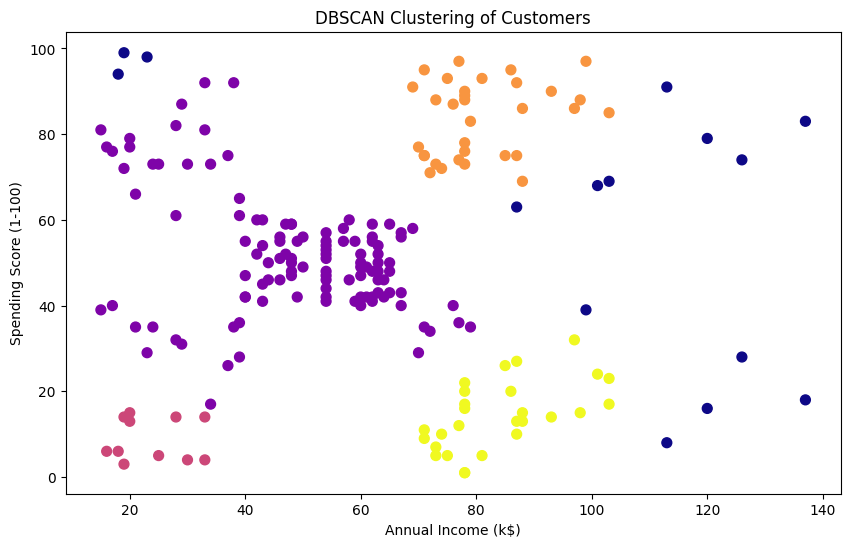

In [ ]:
# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))

# Plot data dengan warna berbeda untuk setiap klaster, -1 untuk noise
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'],
            c=df['Cluster'], cmap='plasma', s=50)

plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

### Evaluasi

Berikut adalah beberapa metrik evaluasi yang umum digunakan untuk menilai hasil clustering dari DBSCAN:

### 1. **Silhouette Score**
   - **Definisi:** Silhouette score mengukur seberapa mirip sebuah titik data dengan klusternya sendiri dibandingkan dengan kluster lain. Nilainya berkisar dari -1 hingga 1, di mana nilai yang lebih tinggi menunjukkan bahwa klaster tersebut baik dan jelas.
   - **Perhitungan:** Silhouette score \( s(i) \) untuk sebuah titik data \( i \) didefinisikan sebagai:
$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$
     Di mana:
     - $\( a(i) \)$ adalah rata-rata jarak antara \( i \) dan semua titik data lain dalam klusternya.
     - $\( b(i) \)$ adalah rata-rata jarak antara \( i \) dan semua titik data di kluster terdekat yang tidak mengandung \( i \).

### 2. **Noise Ratio**
   - **Definisi:** Noise Ratio mengukur proporsi titik data yang dianggap noise oleh DBSCAN. Noise adalah titik-titik yang tidak masuk ke dalam klaster manapun.
   - **Penggunaan:** Metrik ini penting untuk memahami berapa banyak data yang tidak terklasifikasi (tidak dimasukkan ke dalam klaster) oleh algoritma. Noise ratio yang tinggi mungkin menunjukkan bahwa parameter \( \epsilon \) (radius) atau minPts (jumlah minimum titik yang diperlukan untuk membentuk klaster) perlu disesuaikan.

### 3. **Contoh Penggunaan:**
   - **Silhouette Score:** Berguna saat klaster yang terbentuk memiliki perbedaan yang jelas dan ingin mengukur kualitas pengelompokan secara individual.
   - **Noise Ratio:** Digunakan untuk mengidentifikasi seberapa besar bagian dari dataset yang dianggap sebagai noise oleh DBSCAN.


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")
# Menghitung Noise Ratio
n_noise = np.sum(labels == -1)
noise_ratio = n_noise / len(X)
print(f"Noise Ratio: {noise_ratio}")

Silhouette Score: 0.41277734797686433
Noise Ratio: 0.075



**Silhouette Score (0.4128)**:
   - Nilai ini menunjukkan bahwa klaster yang dihasilkan memiliki kualitas yang cukup baik, meskipun masih jauh dari sempurna. Skor ini menunjukkan bahwa mayoritas titik data lebih dekat dengan klaster mereka sendiri daripada dengan klaster lain. Namun, nilai di sekitar 0.41 ini juga menunjukkan bahwa ada kemungkinan overlap antar klaster, atau adanya titik-titik yang berada di dekat batas antara klaster yang berbeda. Dengan kata lain, meskipun klasterisasi sudah menunjukkan hasil yang berarti, beberapa titik data mungkin tidak sepenuhnya sesuai dengan satu klaster tertentu.
   
**Noise Ratio (0.075)**:
   - Noise ratio sebesar 7.5% menunjukkan bahwa sekitar 7.5% dari total data dianggap sebagai "noise" oleh DBSCAN, yaitu data yang tidak dapat dimasukkan ke dalam klaster mana pun. Noise dalam konteks DBSCAN adalah titik data yang tidak memiliki cukup titik tetangga yang berdekatan untuk dianggap sebagai bagian dari suatu klaster. Rasio noise yang relatif rendah ini menunjukkan bahwa sebagian besar data dapat dikelompokkan ke dalam klaster yang jelas, dengan hanya sebagian kecil data yang dianggap tidak sesuai dengan klaster manapun.

Dalam Berapa kasus DBSCAN dapat memiliki peforma yang lebih baik dari K-Means:
<p align="center">
  <img src="https://hqlco.github.io/dataset/perb-kmenas.png" alt="Deskripsi Gambar" width="700" height="300">
</p>

### Penjelasan Gambar:
1. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise):**
   - **Klasterisasi**: DBSCAN mampu mengidentifikasi dua klaster utama yang terlihat jelas, dengan satu klaster di bagian tengah (diwarnai kuning) dan klaster lainnya di bagian luar (diwarnai hijau). Beberapa titik data yang terisolasi (diwarnai ungu) dianggap sebagai *noise* oleh DBSCAN, karena mereka tidak memenuhi kriteria kepadatan untuk dimasukkan ke dalam klaster mana pun.
   - **Bentuk Klaster**: DBSCAN dapat mengidentifikasi klaster dengan bentuk yang tidak teratur (seperti cincin luar), sesuai dengan keunggulan algoritma ini yang tidak bergantung pada asumsi bentuk klaster yang bulat atau sferis.

2. **K-Means:**
   - **Klasterisasi**: K-Means juga menghasilkan dua klaster utama, namun distribusi titik data berbeda dari DBSCAN. K-Means cenderung membagi data secara merata berdasarkan jarak ke centroid, yang membuat klaster menjadi lebih simetris dan berbentuk bulat. Hal ini menyebabkan beberapa titik data yang seharusnya teridentifikasi sebagai bagian dari klaster tertentu (misalnya cincin luar) justru dimasukkan ke klaster yang berbeda (di tengah).
   - **Keterbatasan Bentuk Klaster**: Karena K-Means mengasumsikan bahwa klaster berbentuk sferis (bulat), ia kesulitan untuk mengidentifikasi struktur cincin dengan baik. Klaster yang terbentuk cenderung memotong bagian tengah dari cincin tersebut, yang tidak sesuai dengan pola asli data.

### Kesimpulan:
- **DBSCAN** lebih efektif dalam menangani data dengan bentuk klaster yang tidak teratur dan mampu mengidentifikasi *noise*. Algoritma ini cocok untuk dataset di mana klaster tidak berbentuk bulat dan memiliki kepadatan yang berbeda.
- **K-Means**, di sisi lain, cenderung kurang cocok untuk data yang memiliki klaster dengan bentuk kompleks seperti cincin, karena asumsi bentuk bulat dari klaster. Algoritma ini lebih baik digunakan ketika klaster memiliki bentuk sferis dan distribusi yang merata.



## Perbandingan

| **Aspek**                                   | **KMeans**                                                              | **DBSCAN**                                                           |
|---------------------------------------------|-------------------------------------------------------------------------|----------------------------------------------------------------------|
| **Pendekatan Klasterisasi**                 | Berbasis *centroid* (meminimalkan jarak dalam klaster)                  | Berbasis kepadatan (mengidentifikasi area dengan kepadatan tinggi)   |
| **Parameter yang Diperlukan**               | Jumlah klaster (*K*)                                                    | Radius maksimum (*eps*) dan jumlah titik minimum (*minPts*)          |
| **Bentuk Klaster**                          | Klaster cenderung berbentuk bulat atau sferis                           | Klaster dapat berbentuk sembarang, fleksibel                         |
| **Pengaruh Skala Data**                     | Sangat sensitif terhadap skala data, memerlukan normalisasi             | Kurang sensitif terhadap skala data                                  |
| **Kekebalan terhadap Outlier**              | Tidak tahan terhadap outlier                                            | Tahan terhadap outlier (outlier dianggap sebagai noise)              |
| **Kinerja pada Data Berukuran Besar**       | Biasanya lebih cepat pada dataset besar                                 | Lebih lambat pada dataset besar jika parameter tidak diatur dengan baik |
| **Kebutuhan Normalisasi Data**              | Diperlukan normalisasi untuk hasil optimal                              | Kurang bergantung pada normalisasi data                              |
| **Kemampuan Menangani Klaster dengan Kepadatan Berbeda** | Sulit menangani klaster dengan kepadatan berbeda               | Sangat baik dalam menangani klaster dengan kepadatan berbeda         |
| **Kriteria Penghentian**                    | Penghentian ketika perubahan klasterisasi menjadi sangat kecil          | Penghentian ketika tidak ada lagi titik yang dapat ditambahkan ke klaster |
| **Penggunaan di Dunia Nyata**               | Digunakan dalam pengelompokan pelanggan, segmentasi pasar               | Digunakan dalam deteksi anomali, segmentasi gambar                   |
